In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import torch
import matplotlib.pyplot as plt

In [3]:
def get_mnist_dataset(
    train_transformers=transforms.ToTensor(), test_transformers=transforms.ToTensor()
) -> Dataset:
    mnist_train_dataset = datasets.MNIST(
        root="./data", train=True, download=True, transform=train_transformers
    )
    mnist_test_dataset = datasets.MNIST(
        root="./data", train=False, download=True, transform=test_transformers
    )
    return mnist_train_dataset, mnist_test_dataset


In [9]:
def get_mnist_dataloaders(batch_size: int) -> Dataset:
    mnist_train_dataset = datasets.MNIST(
        root="./data", train=True, download=True, transform=transforms.ToTensor()
    )
    mnist_test_dataset = datasets.MNIST(
        root="./data", train=False, download=True, transform=transforms.ToTensor()
    )
    return mnist_train_dataset, mnist_test_dataset


In [7]:
mnist_train_dataset, mnist_test_dataset = get_mnist_dataset()

In [10]:
mnist_train_dataloder, mnist_test_dataloder = get_mnist_dataloaders(64)


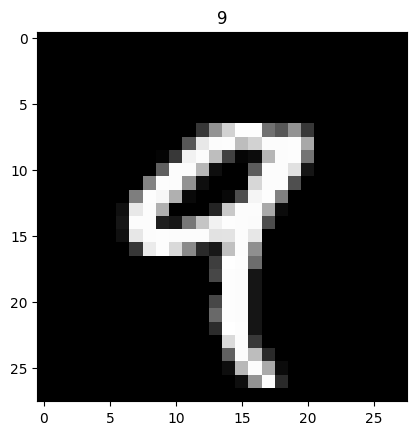

In [14]:
def plot_dataset_image(idx: int, dataset: Dataset):
    image, label = dataset[idx]
    image_reshaped = image.reshape(28, 28)

    plt.imshow(image_reshaped, cmap="gray")
    plt.title(label)
    plt.show()


get_image(4, mnist_train_dataset)


In [16]:
import torch.nn.functional as F


In [65]:
def blurring_image(image: torch.Tensor, kernel_size: int = 3) -> torch.Tensor:
    kernel = torch.ones(kernel_size, kernel_size) / kernel_size**2
    return F.conv2d(image.unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0))


def edging_image(image: torch.Tensor):
    kernel = torch.tensor([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype=torch.float)
    return F.conv2d(image.unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0))


def finding_horizontal_lines(image: torch.Tensor):
    kernel = torch.tensor([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=torch.float)
    return F.conv2d(image.unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0))


def finding_vertical_lines(image: torch.Tensor):
    kernel = torch.tensor([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=torch.float)
    return F.conv2d(image.unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0))

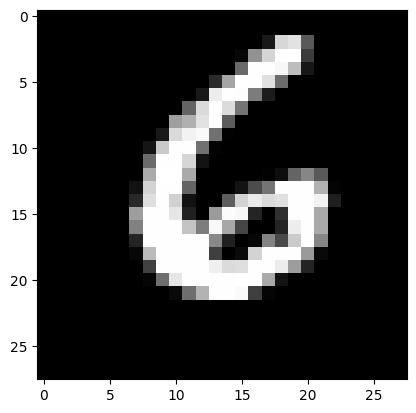

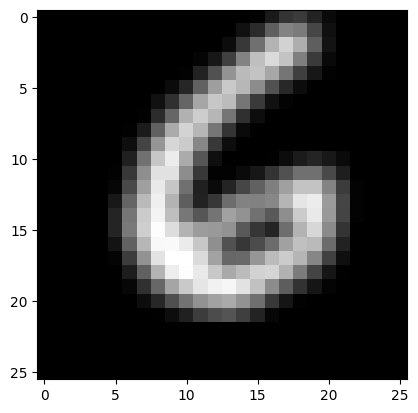

In [66]:
image, _ = mnist_train_dataset[90]

new_image = blurring_image(image)

plt.imshow(image.reshape(28, 28), cmap="gray")
plt.show()
plt.imshow(new_image.reshape(26, 26), cmap="gray")
plt.show()

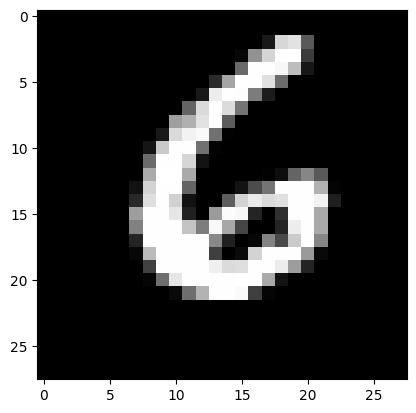

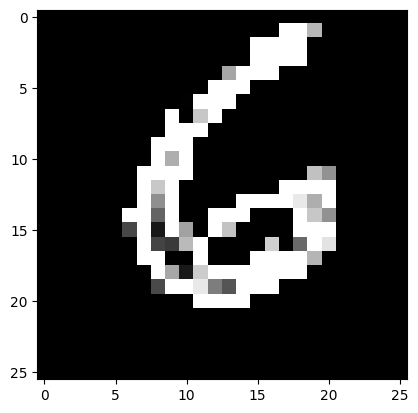

In [70]:
image, _ = mnist_train_dataset[90]

new_image = edging_image(image)

plt.imshow(image.reshape(28, 28), cmap="gray")
plt.show()
plt.imshow(new_image.reshape(26, 26), vmin=0, vmax=1, cmap="gray")
plt.show()


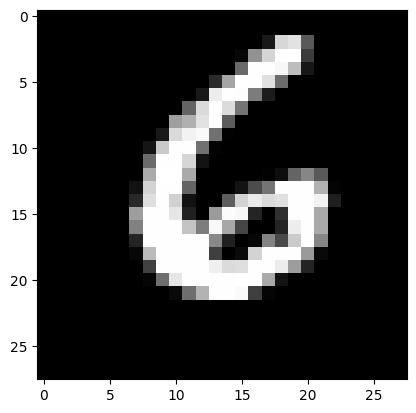

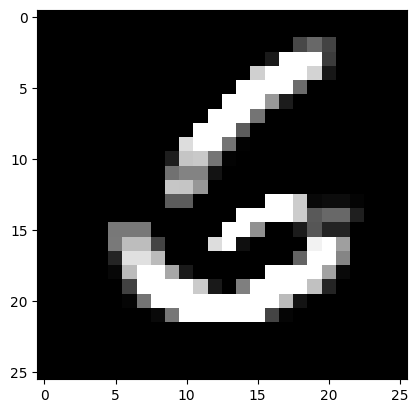

In [71]:
image, _ = mnist_train_dataset[90]

new_image = finding_horizontal_lines(image)

plt.imshow(image.reshape(28, 28), cmap="gray")
plt.show()
plt.imshow(new_image.reshape(26, 26), vmin=0, vmax=1, cmap="gray")
plt.show()

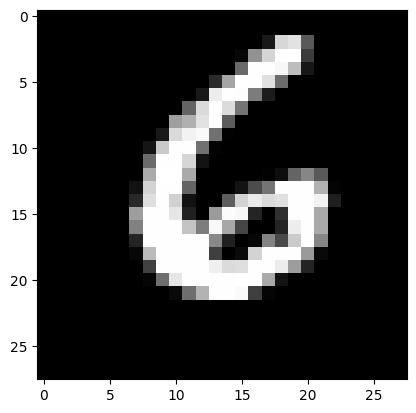

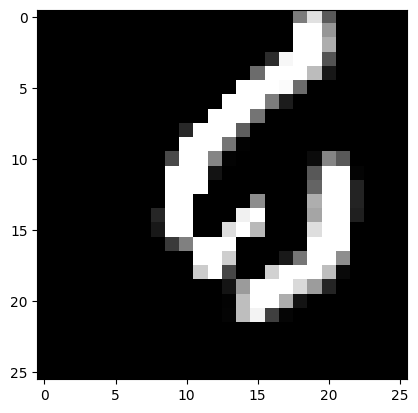

In [72]:
image, _ = mnist_train_dataset[90]

new_image = finding_vertical_lines(image)

plt.imshow(image.reshape(28, 28), cmap="gray")
plt.show()
plt.imshow(new_image.reshape(26, 26), vmin=0, vmax=1, cmap="gray")
plt.show()
